# Clean Bibliography

To goal of this notebook is to clean your `.bib` file to ensure that it only contains the full first names of references that you have cited in your paper. The full first names will then be used to query the probabilistic gender classifier, [Gender API](https://gender-api.com). The full names will be used to query for probabilistic race using the [ethnicolr package](https://ethnicolr.readthedocs.io/).

The only required file you need is your manuscript's bibliography in `.bib` format. __Your `.bib` must only contain references cited in the manuscript__. Otherwise, the estimated proportions will be inaccurate.

If you intend to analyze the reference list of a published paper instead of your own manuscript in progress, search the paper on [Web of Knowledge](http://apps.webofknowledge.com/) (you will need institutional access). Next, [download the .bib file from Web of Science following these instructions, but start from Step 4 and on Step 6 select BibTeX instead of Plain Text](https://github.com/jdwor/gendercitation/blob/master/Step0_PullingWOSdata.pdf).

If you are not using LaTeX, collect and organize only the references you have cited in your manuscript using your reference manager of choice (e.g. Mendeley, Zotero, EndNote, ReadCube, etc.) and export that selected bibliography as a `.bib` file. __Please try to export your .bib in an output style that uses full first names (rather than only first initials) and using the full author lists (rather than abbreviated author lists with "et al.").__ If first initials are included, our code will automatically retrieve about 70% of those names using the article title or DOI. 

   * [Export `.bib` from Mendeley](https://blog.mendeley.com/2011/10/25/howto-use-mendeley-to-create-citations-using-latex-and-bibtex/)
   * [Export `.bib` from Zotero](https://libguides.mit.edu/ld.php?content_id=34248570)
   * [Export `.bib` from EndNote](https://www.reed.edu/cis/help/LaTeX/EndNote.html). Note: Please export full first names by either [choosing an output style that does so by default (e.g. in MLA style)](https://canterbury.libguides.com/endnote/basics-output) or by [customizing an output style.](http://bibliotek.usn.no/cite-and-write/endnote/how-to-use/how-to-show-the-author-s-full-name-in-the-reference-list-article185897-28181.html)
   * [Export `.bib` from Read Cube Papers](https://support.papersapp.com/support/solutions/articles/30000024634-how-can-i-export-references-from-readcube-papers-)

For those working in LaTeX, we can use an optional `.aux` file to automatically filter your `.bib` to check that it only contains entries which are cited in your manuscript.

| Input                 | Output                                                                                                                        |
|-----------------------|-------------------------------------------------------------------------------------------------------------------------------|
| `.bib` file(s)**(REQUIRED)**    | `cleanBib.csv`: table of author first names, titles, and .bib keys                                                            |
| `.aux` file (OPTIONAL)| `predictions.csv`: table of author first names, estimated gender classification, and confidence                                   |
| `.tex` file (OPTIONAL) | `race_gender_citations.pdf`: heat map of your citations broken down by probabilistic gender and race estimations
|                       | `yourTexFile_gendercolor.tex`: your `.tex` file modified to compile .pdf with in-line citations colored-coded by gender pairs |

## 1. Import functions

Upload your `.bib` file(s) and _optionally_ an `.aux` file generated from compiling your LaTeX manuscript and your `.tex` file

![upload button](img/upload.png)

![confirm upload button](img/confirmUpload.png)

Then, run the code block below. (click to select the block and then press Ctrl+Enter; or click the block and press the Run button in the top menubar)

In [1]:
import glob
from habanero import Crossref
import sys
import os
from pathlib import Path
wd = Path(os.getcwd())
sys.path.insert(1, f'{wd.absolute()}/utils')
from preprocessing import *
from ethnicolr import pred_fl_reg_name
os.environ["TF_CPP_MIN_LOG_LEVEL"] = "3"
import tensorflow as tf
import seaborn as sns
import matplotlib.pyplot as plt
np.warnings.filterwarnings('ignore', category=np.VisibleDeprecationWarning)
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

cr = Crossref()
homedir = ''
bib_files = glob.glob(homedir + '*.bib')
paper_aux_file = glob.glob(homedir + '*.aux')
paper_bib_file = 'references.bib'
try:
    tex_file = glob.glob(homedir + "*.tex")[0]
    print(tex_file)
    print(paper_aux_file)
    print(bib_files)
except:
    print('No optional .tex file found.')
    print(bib_files)

No optional .tex file found.
['references_empirical.bib']


### 2. Define the _first_ and _last_ author of your paper.

For example: 
```
yourFirstAuthor = 'Teich, Erin G.'
yourLastAuthor = 'Bassett, Danielle S.'
```

And optionally, define any co-first or co-last author(s), making sure to keep the square brackets to define a list.

For example:
```
optionalEqualContributors = ['Dworkin, Jordan', 'Stiso, Jennifer']
```

or 

```
optionalEqualContributors = ['Dworkin, Jordan']
```

If you are analyzing published papers' reference lists from Web of Science, change the variable checkingPublishedArticle to True:
```
checkingPublishedArticle = True
```

Then, run the code block below. (click to select the block and then press Ctrl+Enter; or click the block and press the Run button in the top menubar)

__NOTE__: Please edit your .bib file using information printed by the code and provided in cleanedBib.csv. Edit directly within the Binder environment by clicking the .bib file (as shown below), making modifications, and saving the file (as shown below).

![open button](img/openBib.png)

![save button](img/saveBib.png)

Common issues include:

* Bibliography entry did not include a last author because the author list was truncated by "and Others" or "et al."
* Some older journals articles only provide first initial and not full first names, in which case you will need to go digging via Google to identify that person.
* In rare cases where the author cannot be identified even after searching by hand, replace the first name with "UNKNOWNNAMES" so that the classifier will estimate the gender as unknown.

In [2]:
yourFirstAuthor = 'Kreienkamp, Jannis'
yourLastAuthor = 'Epstude, Kai'
optionalEqualContributors = ['Masked for Peer Review']
checkingPublishedArticle = False

if paper_aux_file:
    find_unused_cites(paper_aux_file)

bib_data = get_bib_data(bib_files[0])
if checkingPublishedArticle:
    get_names_published(homedir, bib_data, cr)
else:
    # find and print duplicates
    bib_data = get_duplicates(bib_data, bib_files[0])
    # get names, remove CDS, find self cites
    get_names(homedir, bib_data, yourFirstAuthor, yourLastAuthor, optionalEqualContributors, cr)
    
bib_check(homedir)

1: Dona1994
2: Chirkov2008
3: Al-Sabiae1995		  <--  ***NAME MISSING OR POSSIBLY INCOMPLETE***
4: Gonidakis2013
5: Noda1990
6: Fitzgerald2014
7: Prapas2019
8: Shi2012
9: Sundram2008
10: Vignes1979
11: Ea2010
12: Gonzalez-Castro2011
13: Maas2019
14: Stodolska2000
15: Nicolaou2006
16: Ward2005
17: Irvin2013
18: Yoon2006
19: Koca2014
20: Ellis2010
21: Lee2017d
22: Lonnqvist2015
23: Maty2011
24: Leu2011
25: Sharapova2018
26: Shin2005
27: Curran2002
28: Peek2010
29: Sabina2015
30: Lopez-Zafra2014
31: Bauer2012
32: Jasinskaja-Lahti2007
33: Tonsing2016
34: Ramos2011
35: Goforth2014
36: Lee2019
37: Delforterie2014
38: Guerra2019
39: McKay-Semmler2014
40: Sussner2008
41: Yarova2013
42: Abrahams2007
43: An2008
44: Sonderegger2004
45: Segovia2013
46: Guevarra2005
47: Reyes1995
48: Fuentes-Afflick2008
49: Birman2010
50: Fuligni2008
51: Schachner2016
52: Updegraff2012
53: DeSouza2013
54: Markides2012
55: Azar2009
56: Handojo2000
57: Eisenberg2019
58: Afable-Munsuz2013
59: Vella2011
60: Nortey2005
61

501: Zlotnick2019
502: Mokounkolo2008
503: Lee1994
504: Yao1979
505: Knipscheer2000
506: Cernovsky1990a
507: Rania2019
508: Chen2017
509: Arends-Toth2007
510: Ward2012
511: Ben-Shalom2003
512: Mchitarjan2015
513: Collins2010a
514: Koydemir2013
515: Constantine2010
516: Rodriguez-Reimann2004
517: Bowe2019
518: Eshun2006
519: Chan2009
520: Nguyen2011
521: Chen2018
522: Reiss2015

 STOP: Please revise incomplete full first names or empty cells. Then, re-run step 2. Here are some suggestions to check for with the following citation keys in your .bib file: 
['Al-Sabiae1995', 'Au1998', 'Lam2004', 'Lee2014d', 'Chan2006']



 Only continue if you've run step 2, and this code no longer returns error or instructions to revise the .bib file.


## 3. Estimate gender and race of authors from cleaned bibliography

### Checkpoint for cleaned bibliography and using Gender API to estimate genders and race by names
After registering for a [gender-api](https://gender-api.com/) account (free), use your 500 free monthly search credits by __pasting your API key in the code for the line indicated below__ (replace only YOUR ACCOUNT KEY HERE):

```genderAPI_key = '&key=YOUR ACCOUNT KEY HERE'```

[You can find your key in your account's profile page.](https://gender-api.com/en/account/overview#my-api-key)

Then, run the code blocks below to estimate how many credits we will need to use. (click to select the block and then press Ctrl+Enter; or click the block and press the Run button in the top menubar)

In [3]:
genderAPI_key = '&key=YJqTGjeTkupGNS9RYWYD6lUBWrfUV5DxjRX2'

# Check your credit balance
check_genderAPI_balance(genderAPI_key, homedir)

Remaining credits: 9395
This should use (at most) 811 credits, saving you approx 227 credit(s) by storing queries.


## 4. Describe the proportions of genders in your reference list and compare it to published base rates in neuroscience.

__NOTE__: your free GenderAPI account has 500 queries per month. This box contains the code that will use your limited API credits/queries if it runs without error. Re-running all code repeatedly will repeatedly use these credits.

Run the code blocks below. (click to select the block and then press Ctrl+Enter; or click the block and press the Run button in the top menubar)

In [4]:
mm, wm, mw, ww, WW, aw, wa, aa, citation_matrix, paper_df = get_pred_demos((yourFirstAuthor+' '+yourLastAuthor).replace(',',''), homedir, bib_data, genderAPI_key)
statement, statementLatex = print_statements(mm, wm, mw, ww, WW, aw, wa, aa)

first author is Jannis Kreienkamp 
last author is Kai Epstude 
we don't count these, but check the predictions file to ensure your names did not slip through!
looping through your references, predicting gender and race


100%|█████████████████████████████████████████| 522/522 [02:04<00:00,  4.18it/s]


Queried gender api 642 times out of 1044 entries
Queried race/ethnicity api 812 times out of 1044 entries


## 5. Print the Diversity Statement and visualize your results

The example template can be copied and pasted into your manuscript. We have included it in our methods or references section. If you are using LaTeX, [the bibliography file can be found here](https://github.com/dalejn/cleanBib/blob/master/diversityStatement/).

### Additional info about the neuroscience benchmark
For the top 5 neuroscience journals (Nature Neuroscience, Neuron, Brain, Journal of Neuroscience, and Neuroimage), the expected gender proportions in reference lists as reported by [Dworkin et al.](https://www.biorxiv.org/content/10.1101/2020.01.03.894378v1.full.pdf) are 58.4% for man/man, 9.4% for man/woman, 25.5% for woman/man, and 6.7% for woman/woman. Expected proportions were calculated by randomly sampling papers from 28,505 articles in the 5 journals, estimating gender breakdowns using probabilistic name classification tools, and regressing for relevant article variables like publication date, journal, number of authors, review article or not, and first-/last-author seniority. See [Dworkin et al.](https://www.biorxiv.org/content/10.1101/2020.01.03.894378v1.full.pdf) for more details. 

Using a similar random draw model regressing for relevant variables, the expected race proportions in reference lists as reported by Bertolero et al. were 51.8% for white/white, 12.8% for white/author-of-color, 23.5% for author-of-color/white, and 11.9% for author-of-color/author-of-color. 

This box does NOT contain code that will use your limited API credits/queries.

Run the code block below. (click to select the block and then press Ctrl+Enter; or click the block and press the Run button in the top menubar)

Plain text template:
Recent work in several fields of science has identified a bias in citation practices such that papers from women and other minority scholars are under-cited relative to the number of such papers in the field (1-9). Here we sought to proactively consider choosing references that reflect the diversity of the field in thought, form of contribution, gender, race, ethnicity, and other factors. First, we obtained the predicted gender of the first and last author of each reference by using databases that store the probability of a first name being carried by a woman (5, 10). By this measure and excluding self-citations to the first and last authors of our current paper), our references contain 40.18% woman(first)/woman(last), 11.82% man/woman, 22.32% woman/man, and 25.68% man/man. This method is limited in that a) names, pronouns, and social media profiles used to construct the databases may not, in every case, be indicative of gender identity and b) it cannot account for

TypeError: not all arguments converted during string formatting

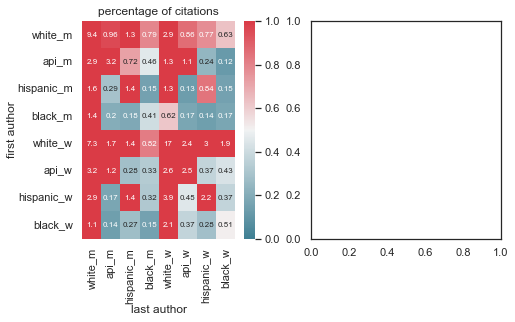

In [5]:
print('Plain text template:')
print(statement)
print('\n')
print('LaTeX template:')
print(statementLatex)

paper_df.to_csv('predictions.csv')

plot_heatmaps(citation_matrix, homedir)

plot_histograms()

### (OPTIONAL) Color-code your .tex file using the estimated gender classifications

Running this code-block will optionally output your uploaded `.tex` file with color-coding for gender pair classifications. You can find the [example below's pre-print here.](https://www.biorxiv.org/content/10.1101/664250v1)

![Color-coded .tex file, Eli Cornblath](img/texColors.png)

In [6]:
colorful_latex(paper_df, homedir, tex_file, bib_data)

NameError: name 'tex_file' is not defined